In [2]:
!pip install torch

In [3]:
!pip install datasets


In [4]:
# import torch
# from transformers import T5ForConditionalGeneration, T5Tokenizer, pipeline
# import spacy
# from datasets import load_dataset
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.ldamodel import LdaModel
# from gensim import corpora
# import random
# # Load NLP tools
# nlp = spacy.load("en_core_web_sm")  # NER model
# sentiment_analyzer = pipeline("sentiment-analysis")

# # Load T5 model and tokenizer
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = T5ForConditionalGeneration.from_pretrained("Michau/t5-base-en-generate-headline").to(device)
# tokenizer = T5Tokenizer.from_pretrained("Michau/t5-base-en-generate-headline")

# # Load dataset
# dataset = load_dataset("cnn_dailymail", "3.0.0")

# def get_emoticon(sentiment, key_phrases):
#     theme_emojis = {
#         "politics": ["👔", "🏛️"],
#         "sports": ["⚽", "🏀", "🏈", "🎾"],
#         "entertainment": ["🎬", "🎤"],
#         "economy": ["💸", "📉", "📈"],
#         "technology": ["💻", "📱"],
#         "travel": ["✈️", "🌍"],
#         "health": ["💉", "🏥"],
#         "emergency": ["🚨", "🚒"],
#         "war": ["⚔️", "🛡️"]
#     }
#     # Check if any key phrase matches theme categories
#     for theme, emojis in theme_emojis.items():
#         if any(word in key_phrases for word in theme.split()):
#             return random.choice(emojis)  # Return an emoji matching the theme

#     # Default emojis based on sentiment
#     sentiment_emojis = {
#         "POSITIVE": "😊",
#         "NEGATIVE": "😢",
#         "NEUTRAL": "😐"
#     }
#     return sentiment_emojis[sentiment]

# # Function to perform LDA and extract key phrases
# def extract_key_phrases(text, num_topics=1, num_words=15):
#     # Tokenize and clean up text
#     tokens = [tok.lemma_.lower() for tok in nlp(text) if tok.is_alpha and not tok.is_stop]
#     dictionary = corpora.Dictionary([tokens])
#     corpus = [dictionary.doc2bow(tokens)]

#     # Perform LDA
#     lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
#     key_phrases = [dictionary[word_id] for word_id, _ in lda.get_topic_terms(0, topn=num_words)]
#     return ' '.join(key_phrases)

# # Function to extract entities using NER
# def extract_entities(text):
#     doc = nlp(text)
#     return ' '.join([ent.text for ent in doc.ents])


# def process_and_generate_headline(article):
#     # Extract key phrases and entities
#     key_phrases = extract_key_phrases(article)
#     entities = extract_entities(article)
#     enriched_text = f"{key_phrases} {entities} {article}"

#     # Prepare text for headline generation
#     text = "headline: " + enriched_text
#     encoding = tokenizer.encode_plus(text, return_tensors="pt")
#     input_ids = encoding["input_ids"].to(device)
#     attention_masks = encoding["attention_mask"].to(device)

#     # Generate headline
#     beam_outputs = model.generate(
#         input_ids=input_ids,
#         attention_mask=attention_masks,
#         max_length=64,
#         num_beams=3,
#         early_stopping=True
#     )
#     generated_headline = tokenizer.decode(beam_outputs[0], skip_special_tokens=True)

#     # Perform sentiment analysis
#     sentiment_result = sentiment_analyzer(generated_headline)[0]
#     sentiment = sentiment_result['label']

#     # Get emoticon based on sentiment and themes identified in key phrases
#     emoticon = get_emoticon(sentiment, key_phrases)

#     headline_with_emoticon = f"{generated_headline} {emoticon}"
#     return headline_with_emoticon

# # Example usage
# article = dataset["train"][10]["article"]
# headline = process_and_generate_headline(article)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

In [35]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, pipeline
import spacy
from datasets import load_dataset
import torch
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import random

# Load NLP tools and dataset
nlp = spacy.load("en_core_web_sm")  # NER model
sentiment_analyzer = pipeline("sentiment-analysis")
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Load T5 model and tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = T5ForConditionalGeneration.from_pretrained("Michau/t5-base-en-generate-headline").to(device)
tokenizer = T5Tokenizer.from_pretrained("Michau/t5-base-en-generate-headline")

def get_emoticon(sentiment, key_phrases):
    theme_emojis = {
        "politics": ["👔", "🏛️"],
        "sports": ["⚽", "🏀", "🏈", "🎾"],
        "entertainment": ["🎬", "🎤"],
        "economy": ["💸", "📉", "📈"],
        "technology": ["💻", "📱"],
        "travel": ["✈️", "🌍"],
        "health": ["💉", "🏥"],
        "emergency": ["🚨", "🚒"],
        "war": ["⚔️", "🛡️"]
    }
    # Select emojis based on sentiment and theme
    emojis = [random.choice(emojis) for theme, emojis in theme_emojis.items() if any(word in key_phrases for word in theme.split())]
    sentiment_emojis = {
        "POSITIVE": "😊",
        "NEGATIVE": "😢",
        "NEUTRAL": "😐"
    }
    # Include sentiment emoji and one theme emoji if available
    if emojis:
        return sentiment_emojis[sentiment] + " " + emojis[0]
    return sentiment_emojis[sentiment]

def extract_key_phrases(text, num_topics=1, num_words=15):
    tokens = [tok.lemma_.lower() for tok in nlp(text) if tok.is_alpha and not tok.is_stop]
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    key_phrases = [dictionary[word_id] for word_id, _ in lda.get_topic_terms(0, topn=num_words)]
    return ' '.join(key_phrases)

def extract_entities(text):
    doc = nlp(text)
    return doc.ents  # Return entities directly for further processing

def process_and_generate_headline(article):
    key_phrases = extract_key_phrases(article)
    entities = extract_entities(article)
    # Choose the most prominent entity (the first one for simplicity)
    prominent_entity = entities[0].text if entities else "No prominent entity"

    enriched_text = f"{key_phrases} {prominent_entity} {article}"
    text = "headline: " + enriched_text
    encoding = tokenizer.encode_plus(text, return_tensors="pt")
    input_ids = encoding["input_ids"].to(device)
    attention_masks = encoding["attention_mask"].to(device)

    beam_outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_masks,
        max_length=64,
        num_beams=3,
        early_stopping=True
    )
    generated_headline = tokenizer.decode(beam_outputs[0], skip_special_tokens=True)
    sentiment_result = sentiment_analyzer(generated_headline)[0]
    sentiment = sentiment_result['label']

    emoticon = get_emoticon(sentiment, key_phrases)
    headline_with_emoticon = f"{generated_headline} {emoticon} [{prominent_entity}]"
    return headline_with_emoticon

# Example usage
article = dataset["train"][10]["article"]
headline = process_and_generate_headline(article)
print(headline)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Token indices sequence length is longer than the specified maximum sequence length for this model (1104 > 512). Running this sequence through the model will result in indexing errors


Bush to Invoke History to Defend America in Iraq 😊 🛡️ [WASHINGTON]


In [27]:
print(article)
print("Generated Headline:", headline)

WASHINGTON (CNN) -- As he awaits a crucial progress report on Iraq, President Bush will try to put a twist on comparisons of the war to Vietnam by invoking the historical lessons of that conflict to argue against pulling out. President Bush pauses Tuesday during a news conference at the  North American Leaders summit in Canada. On Wednesday in Kansas City, Missouri, Bush will tell members of the Veterans of Foreign Wars that "then, as now, people argued that the real problem was America's presence and that if we would just withdraw, the killing would end," according to speech excerpts released Tuesday by the White House. "Three decades later, there is a legitimate debate about how we got into the Vietnam War and how we left," Bush will say. "Whatever your position in that debate, one unmistakable legacy of Vietnam is that the price of America's withdrawal was paid by millions of innocent citizens, whose agonies would add to our vocabulary new terms like 'boat people,' 're-education cam

In [28]:
article = dataset["train"][10]["article"]
headline_with_emoticon = process_and_generate_headline(article)
print("Generated Headline:", headline_with_emoticon)


Generated Headline: Bush tries to reframe the debate over the Iraq War 😢 ⚔️ [WASHINGTON]


In [29]:
dataset["train"][10]["highlights"]


"President Bush to address the Veterans of Foreign Wars on Wednesday .\nBush to say that withdrawing from Vietnam emboldened today's terrorists .\nSpeech will be latest White House attempt to try to reframe the debate over Iraq ."

In [30]:
def generate_headlines(dataset, num_samples=10):
    reference_headlines = []
    generated_headlines = []
    for i in range(num_samples):
        article = dataset["train"][i]["article"]
        reference_headlines.append(dataset["train"][i]["highlights"])
        generated_headlines.append(process_and_generate_headline(article))
    return reference_headlines, generated_headlines

reference_headlines, generated_headlines = generate_headlines(dataset)


In [31]:
reference_headlines


["Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .",
 'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .',
 'NEW: "I thought I was going to die," driver says .\nMan says pickup truck was folded in half; he just has cut on face .\nDriver: "I probably had a 30-, 35-foot free fall"\nMinnesota bridge collapsed during rush hour Wednesday .',
 'Five small polyps found during procedure; "none worrisome," spokesman says .\nPresident reclaims powers transferred to vice president .\nBush undergoes routine colonoscopy at Camp David .',
 "NEW: NFL chief, Atlanta Falcons owner critical of Michael Vi

In [32]:
generated_headlines

['Harry Potter star Daniel Radcliffe says he won\'t be a "Kid Star" 😢 [LONDON]',
 'Miami\'s "Forgotten Floor" 😢 [Editor]',
 'The Minneapolis Bridge Collapse 😢 [MINNEAPOLIS]',
 "President Bush's Colonoscopy - Doctors Remove Small Polyps From Bush's Colon 😢 [WASHINGTON]",
 'Atlanta Falcons quarterback Michael Vick is suspended without pay. Vick admits to participating in a dogfighting ring. 😢 [CNN]',
 'Youssif Says Burn 😢 [BAGHDAD]',
 "Prostitution in Iraq - A Woman's Choice 😢 [BAGHDAD]",
 "Colombian Defense Ministry Says 'El Negro Acacio' Was Killed 😢 [BOGOTA]",
 'White House Press Secretary Tony Snow to Step Down on September 14 😢 [WASHINGTON]',
 'New York City Police and FBI Investigating New Launcher Tube 😢 [CNN]']

In [9]:
!pip install rouge-score
!pip install nltk


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=affba34498f02b31cab31f124eb2412eaae1ace5a04c273838474053d0b66cd6
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [17]:
!pip install rouge

In [20]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

def calculate_metrics(references, candidates):
    rouge = Rouge()
    bleu_scores = []
    rouge_scores = []

    for ref, cand in zip(references, candidates):
        # Compute BLEU score
        bleu_score = sentence_bleu([ref.split()], cand.split(), weights=(0.25, 0.25, 0.25, 0.25))
        bleu_scores.append(bleu_score)

        # Compute ROUGE scores
        scores = rouge.get_scores(cand, ref)[0]
        rouge_scores.append(scores)

    # Average the scores
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    avg_rouge = {key: sum([d[key]['f'] for d in rouge_scores]) / len(rouge_scores) for key in rouge_scores[0]}

    return avg_bleu, avg_rouge

avg_bleu, avg_rouge = calculate_metrics(reference_headlines, generated_headlines)
print(f"Average BLEU Score: {avg_bleu}")
print(f"Average ROUGE Scores: {avg_rouge}")


Average BLEU Score: 0.0
Average ROUGE Scores: {'rouge-1': 0.0, 'rouge-2': 0.0, 'rouge-l': 0.0}


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarities(generated_headlines, reference_headlines):
    # Create a TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Compute TF-IDF vectors for both sets of headlines
    # First, combine all headlines into a single list for vectorization
    all_headlines = generated_headlines + reference_headlines

    # Transform all headlines into TF-IDF vectors
    tfidf_matrix = vectorizer.fit_transform(all_headlines)

    # Compute cosine similarity between each generated headline and all reference headlines
    similarities = []
    for i in range(len(generated_headlines)):
        # Note: we adjust indices since generated_headlines precede in the all_headlines list
        gen_vec = tfidf_matrix[i:i+1]  # The TF-IDF vector for the ith generated headline
        ref_vecs = tfidf_matrix[len(generated_headlines):]  # All reference headline vectors
        cosine_sim = cosine_similarity(gen_vec, ref_vecs).flatten()
        similarities.append(cosine_sim)

    return similarities



# Compute similarities for each generated headline against all reference headlines
all_similarities = compute_cosine_similarities(generated_headlines, reference_headlines)
for i, sims in enumerate(all_similarities):
    print(f"Cosine Similarities for generated headline {i+1}: {sims}")


Cosine Similarities for generated headline 1: [0.         0.21435461 0.        ]
Cosine Similarities for generated headline 2: [0. 0. 0.]
Cosine Similarities for generated headline 3: [0.         0.09136939 0.        ]
Cosine Similarities for generated headline 4: [0. 0. 0.]
Cosine Similarities for generated headline 5: [0. 0. 0.]
Cosine Similarities for generated headline 6: [0. 0. 0.]
Cosine Similarities for generated headline 7: [0.         0.         0.13528137]
Cosine Similarities for generated headline 8: [0. 0. 0.]
Cosine Similarities for generated headline 9: [0.         0.09441718 0.0772284 ]
Cosine Similarities for generated headline 10: [0. 0. 0.]


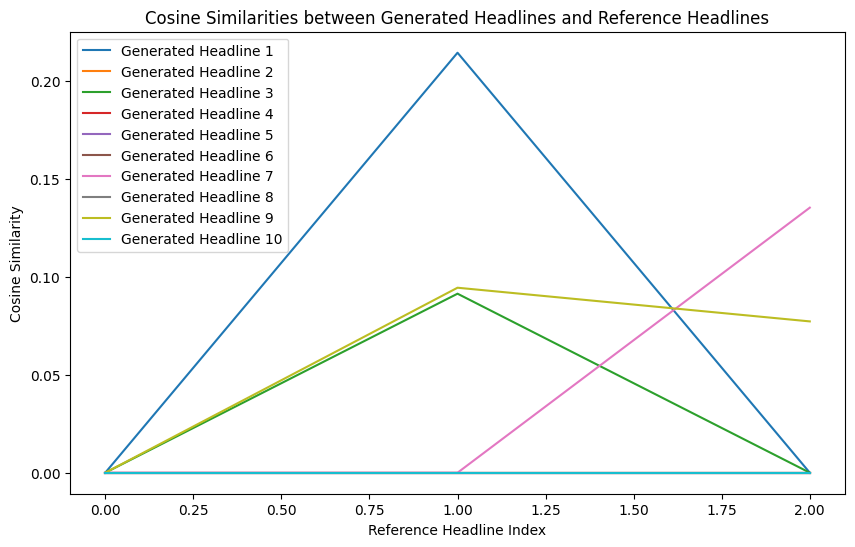

In [36]:
import matplotlib.pyplot as plt

# Plot cosine similarities
plt.figure(figsize=(10, 6))
for i, sims in enumerate(all_similarities):
    plt.plot(range(len(sims)), sims, label=f"Generated Headline {i+1}")

plt.xlabel('Reference Headline Index')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarities between Generated Headlines and Reference Headlines')
plt.legend()
plt.show()
